# Question 7 and 8

## Loading data

In [32]:
import NN_utils
import numpy as np
import matplotlib.pyplot as plt
import plotting

import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import torch.nn as nn
import torch.nn.functional as F

In [ ]:
(x_train_full, y_train_full), (x_test, y_test) = NN_utils.load_mnist_data()

In [4]:
x_test.shape    

torch.Size([10000, 1, 28, 28])

In [ ]:
(x_train, y_train), (x_val, y_val) = NN_utils.split_data(x_train_full, y_train_full)

## Implementing the network and training

### Utils

### Defining model and training procedure

### Training

In [ ]:
# Train the model

model = NN_utils.MNISTConvNet()
# Training on CPU (use "cuda" for GPU training if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
# put the data on the device
x_train, y_train, x_val, y_val = x_train.to(device), y_train.to(device), x_val.to(device), y_val.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

first_epoch_running_loss, train_evaluations, val_evaluations = NN_utils.train(model, x_train, y_train, x_val, y_val, optimizer, criterion, epochs=4, batch_size=16)
print(NN_utils.count_parameters(model))


Batches for epoch 1/4: 100%|██████████| 3125/3125 [00:17<00:00, 176.46it/s]


Epoch 1/4, Train Loss: 0.0042, Train Acc: 0.9790, Val Loss: 0.0043, Val Acc: 0.9800


Batches for epoch 2/4: 100%|██████████| 3125/3125 [00:17<00:00, 179.02it/s]


Epoch 2/4, Train Loss: 0.0023, Train Acc: 0.9878, Val Loss: 0.0027, Val Acc: 0.9868


Batches for epoch 3/4: 100%|██████████| 3125/3125 [00:16<00:00, 184.23it/s]


Epoch 3/4, Train Loss: 0.0016, Train Acc: 0.9915, Val Loss: 0.0023, Val Acc: 0.9886


Batches for epoch 4/4: 100%|██████████| 3125/3125 [00:16<00:00, 192.63it/s]


Epoch 4/4, Train Loss: 0.0011, Train Acc: 0.9939, Val Loss: 0.0024, Val Acc: 0.9892
29066


## Plotting evaluation measures

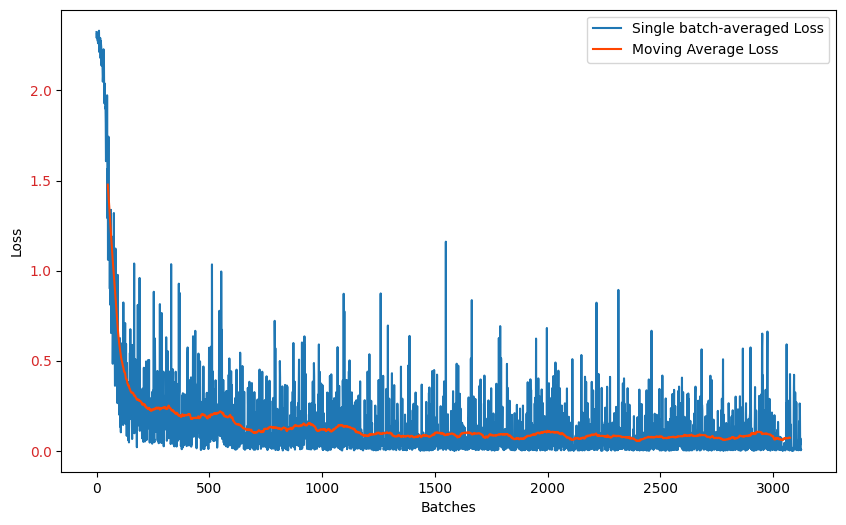

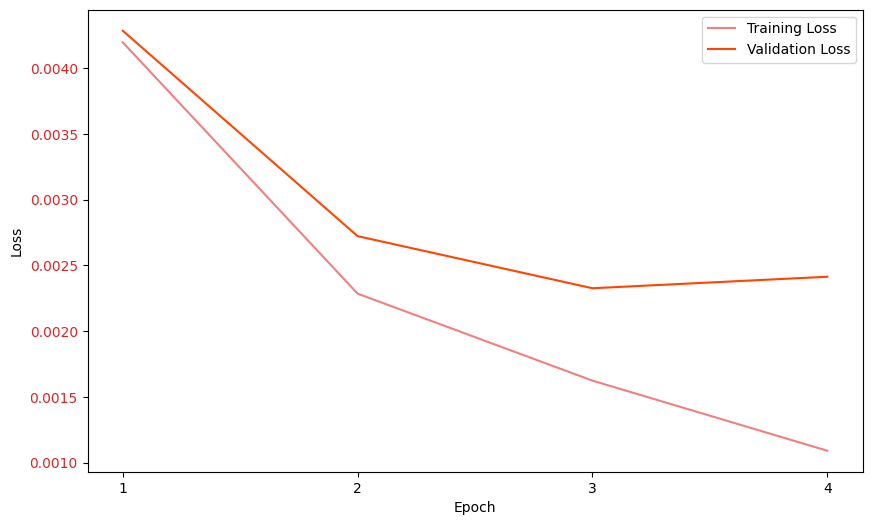

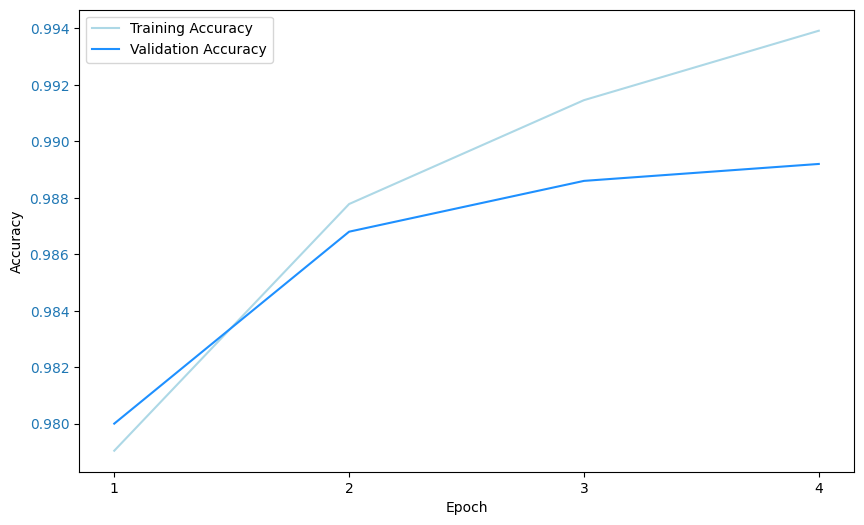

In [ ]:
plotting.plot_results(first_epoch_running_loss, train_evaluations, val_evaluations)

# Question 8

## Tuning the batch size



In [28]:
import plotting
import NN_utils

In [ ]:
# evaluate the model with 3 different batch sizes, then plot the comparisons over 8 epochs for both loss and accuracy

batch_sizes = [16, 32, 64]

results = {}

for batch_size in batch_sizes:
    model = NN_utils.MNISTConvNet()
    model.to(device)
    x_train, y_train, x_val, y_val = x_train.to(device), y_train.to(device), x_val.to(device), y_val.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    first_epoch_running_loss, train_evaluations, val_evaluations = NN_utils.train(model, x_train, y_train, x_val, y_val, optimizer, criterion, epochs=8, batch_size=batch_size)
    results[batch_size] = (first_epoch_running_loss, train_evaluations, val_evaluations)

Batches for epoch 1/8: 100%|██████████| 3125/3125 [00:17<00:00, 183.00it/s]


Epoch 1/8, Train Loss: 0.0037, Train Acc: 0.9812, Val Loss: 0.0038, Val Acc: 0.9823


Batches for epoch 2/8: 100%|██████████| 3125/3125 [00:16<00:00, 186.64it/s]


Epoch 2/8, Train Loss: 0.0022, Train Acc: 0.9885, Val Loss: 0.0029, Val Acc: 0.9865


Batches for epoch 3/8: 100%|██████████| 3125/3125 [00:16<00:00, 186.91it/s]


Epoch 3/8, Train Loss: 0.0013, Train Acc: 0.9930, Val Loss: 0.0024, Val Acc: 0.9893


Batches for epoch 4/8: 100%|██████████| 3125/3125 [00:16<00:00, 185.12it/s]


Epoch 4/8, Train Loss: 0.0011, Train Acc: 0.9940, Val Loss: 0.0026, Val Acc: 0.9894


Batches for epoch 5/8: 100%|██████████| 3125/3125 [00:17<00:00, 180.38it/s]


Epoch 5/8, Train Loss: 0.0010, Train Acc: 0.9948, Val Loss: 0.0026, Val Acc: 0.9894


Batches for epoch 6/8: 100%|██████████| 3125/3125 [00:16<00:00, 187.59it/s]


Epoch 6/8, Train Loss: 0.0015, Train Acc: 0.9924, Val Loss: 0.0036, Val Acc: 0.9870


Batches for epoch 7/8: 100%|██████████| 3125/3125 [00:17<00:00, 182.71it/s]


Epoch 7/8, Train Loss: 0.0008, Train Acc: 0.9952, Val Loss: 0.0034, Val Acc: 0.9892


Batches for epoch 8/8: 100%|██████████| 3125/3125 [00:17<00:00, 178.90it/s]


Epoch 8/8, Train Loss: 0.0009, Train Acc: 0.9950, Val Loss: 0.0032, Val Acc: 0.9904


Batches for epoch 1/8: 100%|██████████| 1563/1563 [00:14<00:00, 110.04it/s]


Epoch 1/8, Train Loss: 0.0027, Train Acc: 0.9722, Val Loss: 0.0025, Val Acc: 0.9770


Batches for epoch 2/8: 100%|██████████| 1563/1563 [00:15<00:00, 101.93it/s]


Epoch 2/8, Train Loss: 0.0015, Train Acc: 0.9846, Val Loss: 0.0016, Val Acc: 0.9843


Batches for epoch 3/8: 100%|██████████| 1563/1563 [00:14<00:00, 108.21it/s]


Epoch 3/8, Train Loss: 0.0010, Train Acc: 0.9898, Val Loss: 0.0013, Val Acc: 0.9874


Batches for epoch 4/8: 100%|██████████| 1563/1563 [00:14<00:00, 104.97it/s]


Epoch 4/8, Train Loss: 0.0009, Train Acc: 0.9902, Val Loss: 0.0013, Val Acc: 0.9888


Batches for epoch 5/8: 100%|██████████| 1563/1563 [00:14<00:00, 105.52it/s]


Epoch 5/8, Train Loss: 0.0007, Train Acc: 0.9924, Val Loss: 0.0013, Val Acc: 0.9892


Batches for epoch 6/8: 100%|██████████| 1563/1563 [00:14<00:00, 109.68it/s]


Epoch 6/8, Train Loss: 0.0012, Train Acc: 0.9864, Val Loss: 0.0017, Val Acc: 0.9868


Batches for epoch 7/8: 100%|██████████| 1563/1563 [00:14<00:00, 105.04it/s]


Epoch 7/8, Train Loss: 0.0010, Train Acc: 0.9889, Val Loss: 0.0017, Val Acc: 0.9868


Batches for epoch 8/8: 100%|██████████| 1563/1563 [00:14<00:00, 109.95it/s]


Epoch 8/8, Train Loss: 0.0004, Train Acc: 0.9963, Val Loss: 0.0013, Val Acc: 0.9912


Batches for epoch 1/8: 100%|██████████| 782/782 [00:13<00:00, 59.42it/s]


Epoch 1/8, Train Loss: 0.0012, Train Acc: 0.9770, Val Loss: 0.0011, Val Acc: 0.9796


Batches for epoch 2/8: 100%|██████████| 782/782 [00:13<00:00, 58.00it/s]


Epoch 2/8, Train Loss: 0.0008, Train Acc: 0.9839, Val Loss: 0.0008, Val Acc: 0.9846


Batches for epoch 3/8: 100%|██████████| 782/782 [00:13<00:00, 59.18it/s]


Epoch 3/8, Train Loss: 0.0006, Train Acc: 0.9871, Val Loss: 0.0008, Val Acc: 0.9864


Batches for epoch 4/8: 100%|██████████| 782/782 [00:13<00:00, 57.33it/s]


Epoch 4/8, Train Loss: 0.0005, Train Acc: 0.9889, Val Loss: 0.0007, Val Acc: 0.9874


Batches for epoch 5/8: 100%|██████████| 782/782 [00:16<00:00, 46.73it/s]


Epoch 5/8, Train Loss: 0.0005, Train Acc: 0.9903, Val Loss: 0.0007, Val Acc: 0.9876


Batches for epoch 6/8: 100%|██████████| 782/782 [00:13<00:00, 55.95it/s]


Epoch 6/8, Train Loss: 0.0004, Train Acc: 0.9921, Val Loss: 0.0007, Val Acc: 0.9884


Batches for epoch 7/8: 100%|██████████| 782/782 [00:13<00:00, 59.19it/s]


Epoch 7/8, Train Loss: 0.0003, Train Acc: 0.9934, Val Loss: 0.0008, Val Acc: 0.9893


Batches for epoch 8/8: 100%|██████████| 782/782 [00:13<00:00, 57.82it/s]


Epoch 8/8, Train Loss: 0.0004, Train Acc: 0.9913, Val Loss: 0.0009, Val Acc: 0.9866


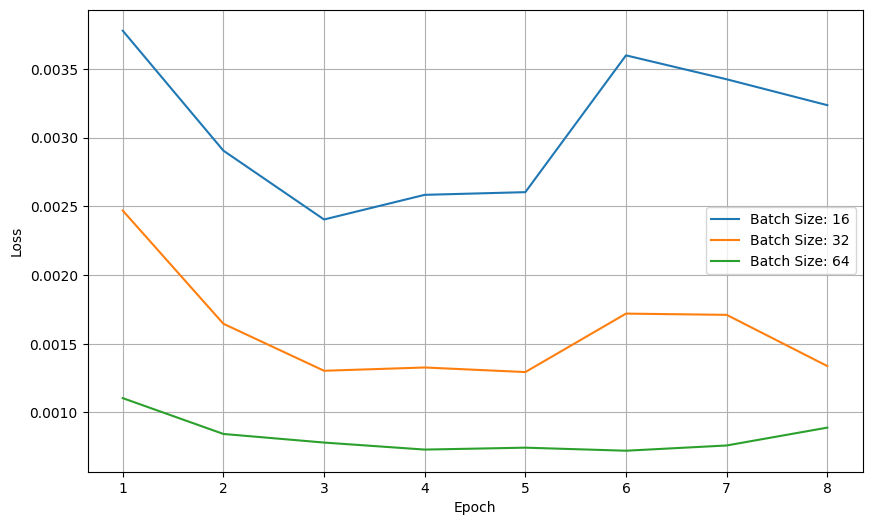

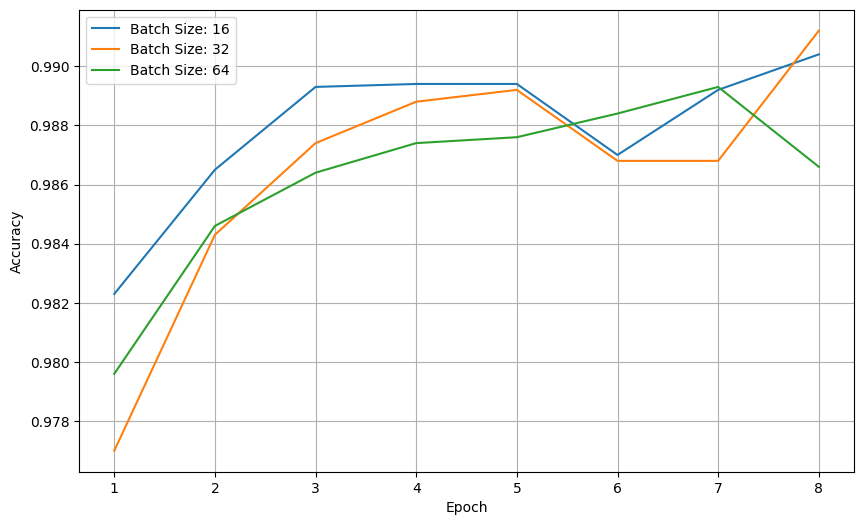

In [29]:
plotting.plot_param_comparison(results, 'Batch Size')

# Question 11

## Max and Mean pooling

In [30]:
import torch  

b, c, h, w = 4, 10, 32, 32
x1 = torch.randn(b, c, h, w)
x2 = torch.randn(b, c, h*2, w*2)

x1_mean_pool = x1.mean(dim=(-2, -1))
x1_max_pool = x1.amax(dim=(-2, -1))
# Alteratively
# import torch.nn.functional as F
x1_max_pool_func = F.max_pool2d(x1, kernel_size=x1.size()[2:]).squeeze() # squeeze  because otherwise the shape would be (b, c, 1, 1)
x1_mean_pool_func = F.avg_pool2d(x1, kernel_size=x1.size()[2:]).squeeze()

print("x1_max_pool_func shape:", x1_max_pool_func.shape)  # should be (b, c)

x2_mean_pool = x2.mean(dim=(-2, -1))
x2_max_pool = x2.amax(dim=(-2, -1))

print("x1_mean_pool shape:", x1_mean_pool.shape)  # should be (b, c)
print("x1_max_pool shape:", x1_max_pool.shape)    # should be (b, c)

print("x2_mean_pool shape:", x2_mean_pool.shape)  # should be (b, c)
print("x2_max_pool shape:", x2_max_pool.shape)    # should be (b, c)

x1_max_pool_func shape: torch.Size([4, 10])
x1_mean_pool shape: torch.Size([4, 10])
x1_max_pool shape: torch.Size([4, 10])
x2_mean_pool shape: torch.Size([4, 10])
x2_max_pool shape: torch.Size([4, 10])


## Data Loading

For the code below to work you should add the decompressed minist_varres folder inside ./data/MNIST

In [31]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import Compose, Resize, ToTensor, Grayscale
import matplotlib.pyplot as plt


# Load the variable resolution dataset
varres_transform = Compose([  
    Resize((28, 28)),
    Grayscale(num_output_channels=1),
    ToTensor()
])

varres_test = ImageFolder(root='./data/MNIST/mnist-varres/test', transform=varres_transform)

vatters_train = ImageFolder(root='./data/MNIST/mnist-varres/train', transform=varres_transform)

# Split into training and validation sets
train_size = int(0.8 * len(vatters_train))
val_size = len(vatters_train) - train_size
train_varres_dataset, val_varres_dataset = torch.utils.data.random_split(vatters_train, [train_size, val_size])


# Create data loaders
train_varres_loader = DataLoader(train_varres_dataset, batch_size=len(train_varres_dataset), shuffle=True)
val_varres_loader = DataLoader(val_varres_dataset, batch_size=len(val_varres_dataset), shuffle=False)

test_varres_loader = DataLoader(varres_test, batch_size=len(varres_test), shuffle=False)


#load the whole dataset into tensors
x_train_resized, y_train_resized= next(iter(train_varres_loader))
x_val_resized, y_val_resized = next(iter(val_varres_loader))
x_test_resized, y_test_resized = next(iter(test_varres_loader))


# Question 12

## Training

In [37]:
# Train the model

model = NN_utils.MNISTConvNet()
# Training on CPU (use "cuda" for GPU training if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
# put the data on the device
x_train_resized, y_train_resized, x_val_resized, y_val_resized = x_train_resized.to(device), y_train_resized.to(device), x_val_resized.to(device), y_val_resized.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

first_epoch_running_loss, train_evaluations, val_evaluations = NN_utils.train(model, x_train_resized, y_train_resized, x_val_resized, y_val_resized, optimizer, criterion, epochs=8, batch_size=16)

Batches for epoch 1/8: 100%|██████████| 3000/3000 [00:18<00:00, 158.13it/s]


Epoch 1/8, Train Loss: 0.0191, Train Acc: 0.9062, Val Loss: 0.0205, Val Acc: 0.9002


Batches for epoch 2/8: 100%|██████████| 3000/3000 [00:18<00:00, 159.59it/s]


Epoch 2/8, Train Loss: 0.0113, Train Acc: 0.9456, Val Loss: 0.0130, Val Acc: 0.9357


Batches for epoch 3/8: 100%|██████████| 3000/3000 [00:19<00:00, 156.83it/s]


Epoch 3/8, Train Loss: 0.0092, Train Acc: 0.9556, Val Loss: 0.0114, Val Acc: 0.9465


Batches for epoch 4/8: 100%|██████████| 3000/3000 [00:17<00:00, 171.23it/s]


Epoch 4/8, Train Loss: 0.0078, Train Acc: 0.9610, Val Loss: 0.0105, Val Acc: 0.9504


Batches for epoch 5/8: 100%|██████████| 3000/3000 [00:16<00:00, 181.62it/s]


Epoch 5/8, Train Loss: 0.0066, Train Acc: 0.9664, Val Loss: 0.0097, Val Acc: 0.9533


Batches for epoch 6/8: 100%|██████████| 3000/3000 [00:18<00:00, 164.44it/s]


Epoch 6/8, Train Loss: 0.0055, Train Acc: 0.9722, Val Loss: 0.0090, Val Acc: 0.9583


Batches for epoch 7/8: 100%|██████████| 3000/3000 [00:16<00:00, 178.38it/s]


Epoch 7/8, Train Loss: 0.0046, Train Acc: 0.9764, Val Loss: 0.0090, Val Acc: 0.9594


Batches for epoch 8/8: 100%|██████████| 3000/3000 [00:18<00:00, 165.40it/s]


Epoch 8/8, Train Loss: 0.0036, Train Acc: 0.9815, Val Loss: 0.0081, Val Acc: 0.9635


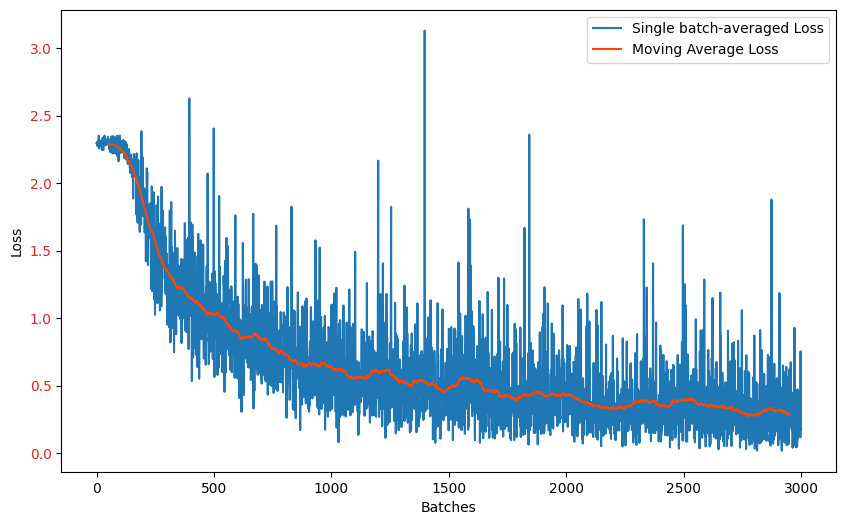

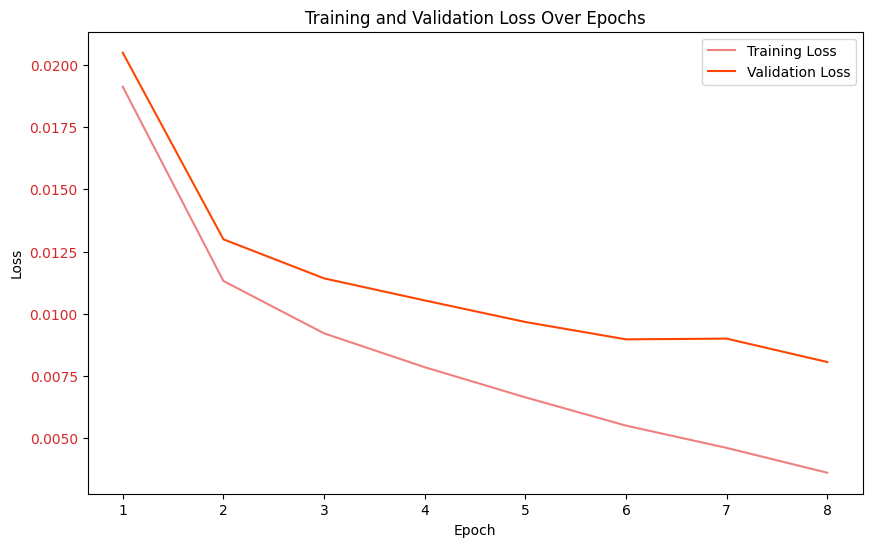

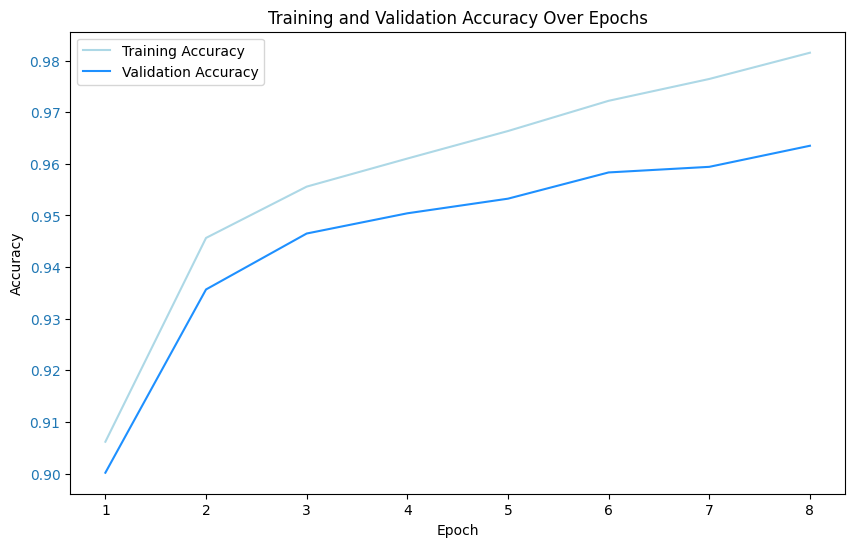

In [38]:
plotting.plot_results(first_epoch_running_loss, train_evaluations, val_evaluations)